In [1]:
import numpy as np
import scipy.special

class neuralNetwork:
    
    def __init__(self, inuptNodes, hiddenNodes, outputNodes, 
                learningRate):
        self.iNodes = inuptNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        
        self.lr = learningRate
        
        # self.wih = np.random.rand(self.hNodes, self.iNodes) - 0.5
        # self.who = np.random.rand(self.oNodes, self.hNodes) - 0.5
        self.wih = np.random.normal(0.0, pow(self.hNodes, -0.5),
                                   (self.hNodes, self.iNodes))
        self.who = np.random.normal(0.0, pow(self.oNodes, -0.5),
                                   (self.oNodes, self.hNodes))
        
        self.actFun = lambda x : scipy.special.expit(x)
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.actFun(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.actFun(final_inputs)
        
        targets = np.array(targets_list, ndmin=2).T
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * 
                                      final_outputs * (1 - final_outputs)),
                                    np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * 
                                      hidden_outputs * (1 - hidden_outputs)),
                                    np.transpose(inputs))
    
    def predict(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.actFun(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.actFun(final_inputs)
        
        return final_outputs

In [2]:
import matplotlib.pyplot
%matplotlib inline

In [3]:
data_file = open("datasets/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [4]:
len(data_list)

100

In [5]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

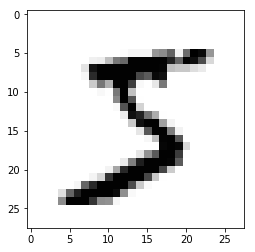

In [6]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [7]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

train_data_file = open('datasets/mnist_train.csv', 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

for record in train_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    nn.train(inputs, targets)

In [8]:
test_data_file = open("datasets/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

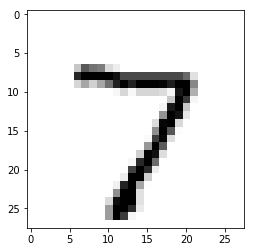

In [9]:
all_values = test_data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [10]:
nn.predict((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[  6.29490881e-03],
       [  1.40938524e-03],
       [  8.13996149e-03],
       [  4.18571213e-04],
       [  1.50474255e-03],
       [  7.30521048e-03],
       [  2.16200857e-03],
       [  9.97755812e-01],
       [  1.36361812e-03],
       [  7.83656331e-04]])

In [11]:
scoreCard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print 'Correct Label:', correct_label
    outputs = nn.predict((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
    label = np.argmax(outputs)
    print "Network's Answer:", label
    
    if label == correct_label:
        scoreCard.append(1)
    else:
        scoreCard.append(0)

Correct Label: 7
Network's Answer: 7
Correct Label: 2
Network's Answer: 2
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 4
Network's Answer: 4
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 5
Network's Answer: 5
Correct Label: 9
Network's Answer: 9
Correct Label: 7
Network's Answer: 7
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 4
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 6
Network's Answer: 6
Correct Label: 5
Network's Answer: 5
Correct Label: 4
Network's Answer: 4
Correct Label: 0
Network's Answer: 0
Correct Label: 7
Network's Answer: 7
C

Correct Label: 0
Network's Answer: 0
Correct Label: 6
Network's Answer: 8
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 2
Network's Answer: 2
Correct Label: 0
Network's Answer: 0
Correct Label: 8
Network's Answer: 8
Correct Label: 8
Network's Answer: 8
Correct Label: 5
Network's Answer: 5
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 1
Network's Answer: 1
Correct Label: 4
Network's Answer: 4
Correct Label: 0
Network's Answer: 0
Correct Label: 3
Network's Answer: 7
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 2
Network's Answer: 2
Correct Label: 8
Network's Answer: 8
C

Correct Label: 6
Network's Answer: 6
Correct Label: 7
Network's Answer: 7
Correct Label: 1
Network's Answer: 1
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 0
Network's Answer: 0
Correct Label: 8
Network's Answer: 8
Correct Label: 9
Network's Answer: 9
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 2
Network's Answer: 2
Correct Label: 5
Network's Answer: 5
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 7
Network's Answer: 7
Correct Label: 8
Network's Answer: 8
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
C

Network's Answer: 6
Correct Label: 3
Network's Answer: 3
Correct Label: 0
Network's Answer: 0
Correct Label: 0
Network's Answer: 0
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 7
Network's Answer: 7
Correct Label: 9
Network's Answer: 9
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 4
Network's Answer: 4
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
Correct Label: 2
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
Correct Label: 8
Network's Answer: 8
Correct Label: 4
N

Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 8
Network's Answer: 8
Correct Label: 1
Network's Answer: 1
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 4
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 4
Correct Label: 3
Network's Answer: 3
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 8
Network's Answer: 8
Correct Label: 0
Network's Answer: 0
Correct Label: 8
N

Correct Label: 8
Network's Answer: 8
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 6
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 0
Network's Answer: 0
Correct Label: 0
Network's Answer: 0
Correct Label: 6
Network's Answer: 6
Correct Label: 3
Network's Answer: 3
Correct Label: 5
Network's Answer: 5
Correct Label: 9
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 5
Network's Answer: 5
Correct Label: 8
Network's Answer: 8
Correct Label: 5
Network's Answer: 5
Correct Label: 3
Network's Answer: 3
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 0
Network's Answer: 0
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 8
Network's Answer: 8
Correct Label: 2
Network's Answer: 2
C

Correct Label: 5
Network's Answer: 5
Correct Label: 7
Network's Answer: 7
Correct Label: 8
Network's Answer: 8
Correct Label: 2
Network's Answer: 2
Correct Label: 7
Network's Answer: 9
Correct Label: 4
Network's Answer: 4
Correct Label: 7
Network's Answer: 7
Correct Label: 1
Network's Answer: 1
Correct Label: 1
Network's Answer: 1
Correct Label: 3
Network's Answer: 3
Correct Label: 6
Network's Answer: 6
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 4
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 4
Network's Answer: 4
Correct Label: 6
Network's Answer: 6
C

Network's Answer: 3
Correct Label: 1
Network's Answer: 1
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 1
Network's Answer: 1
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 9
Network's Answer: 9
Correct Label: 4
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 6
Network's Answer: 6
Correct Label: 8
Network's Answer: 8
Correct Label: 1
Network's Answer: 1
Correct Label: 6
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 9
Correct Label: 7
Network's Answer: 7
Correct Label: 4
Network's Answer: 4
Correct Label: 9
Network's Answer: 9
Correct Label: 5
N

Network's Answer: 6
Correct Label: 7
Network's Answer: 7
Correct Label: 7
Network's Answer: 7
Correct Label: 2
Network's Answer: 2
Correct Label: 8
Network's Answer: 8
Correct Label: 6
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 0
Network's Answer: 0
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 2
Network's Answer: 2
Correct Label: 5
Network's Answer: 5
Correct Label: 3
Network's Answer: 3
Correct Label: 8
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 0
Network's Answer: 0
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 1
Network's Answer: 1
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 6
N

Correct Label: 7
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 0
Network's Answer: 0
Correct Label: 2
Network's Answer: 2
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 7
Network's Answer: 7
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
C

Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 2
Network's Answer: 2
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 4
Network's Answer: 4
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
Correct Label: 3
Network's Answer: 3
Correct Label: 8
Network's Answer: 8
Correct Label: 7
Network's Answer: 9
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 5
Network's Answer: 5
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 5
Network's Answer: 3
Correct Label: 7
Network's Answer: 9
Correct Label: 1
Network's Answer: 1
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 9
Network's Answer: 9
Correct Label: 6
N

Network's Answer: 5
Correct Label: 5
Network's Answer: 5
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 2
Network's Answer: 2
Correct Label: 5
Network's Answer: 5
Correct Label: 8
Network's Answer: 8
Correct Label: 9
Network's Answer: 9
Correct Label: 5
Network's Answer: 5
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 4
Network's Answer: 4
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 4
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 7
Network's Answer: 7
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 4
Correct Label: 5
N

Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 2
Network's Answer: 2
Correct Label: 8
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
Correct Label: 4
Network's Answer: 4
Correct Label: 8
Network's Answer: 8
Correct Label: 8
Network's Answer: 8
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 0
Network's Answer: 0
Correct Label: 5
Network's Answer: 5
Correct Label: 2
Network's Answer: 2
Correct Label: 9
Network's Answer: 9
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 0
Network's Answer: 0
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 5
Network's Answer: 5
Correct Label: 8
Network's Answer: 8
C

Network's Answer: 4
Correct Label: 7
Network's Answer: 7
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 4
Correct Label: 8
Network's Answer: 8
Correct Label: 7
Network's Answer: 7
Correct Label: 8
Network's Answer: 8
Correct Label: 6
Network's Answer: 6
Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 2
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 4
Correct Label: 8
Network's Answer: 8
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 5
Network's Answer: 2
Correct Label: 0
Network's Answer: 0
Correct Label: 2
Network's Answer: 2
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 9
N

Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 6
Network's Answer: 6
Correct Label: 5
Network's Answer: 5
Correct Label: 7
Network's Answer: 7
Correct Label: 0
Network's Answer: 0
Correct Label: 0
Network's Answer: 0
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
Correct Label: 4
Network's Answer: 4
Correct Label: 3
Network's Answer: 3
Correct Label: 2
Network's Answer: 2
Correct Label: 4
Network's Answer: 4
Correct Label: 1
Network's Answer: 1
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 6
Network's Answer: 6
Correct Label: 4
Network's Answer: 4
Correct Label: 7
Network's Answer: 7
Correct Label: 7
Network's Answer: 7
Correct Label: 7
Network's Answer: 7
Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 8
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
C

Network's Answer: 4
Correct Label: 7
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 4
Network's Answer: 4
Correct Label: 5
Network's Answer: 5
Correct Label: 6
Network's Answer: 6
Correct Label: 7
Network's Answer: 2
Correct Label: 0
Network's Answer: 5
Correct Label: 1
Network's Answer: 1
Correct Label: 2
Network's Answer: 2
Correct Label: 7
Network's Answer: 2
Correct Label: 8
Network's Answer: 8
Correct Label: 6
Network's Answer: 6
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 7
Network's Answer: 2
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 6
Network's Answer: 6
Correct Label: 1
Network's Answer: 1
Correct Label: 7
Network's Answer: 7
Correct Label: 2
Network's Answer: 2
Correct Label: 4
Network's Answer: 4
Correct Label: 4
Network's Answer: 4
Correct Label: 5
N

Correct Label: 1
Network's Answer: 1
Correct Label: 8
Network's Answer: 8
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
Correct Label: 7
Network's Answer: 7
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 8
Network's Answer: 8
Correct Label: 4
Network's Answer: 4
Correct Label: 7
Network's Answer: 7
Correct Label: 7
Network's Answer: 7
Correct Label: 6
Network's Answer: 6
Correct Label: 2
Network's Answer: 2
Correct Label: 1
Network's Answer: 1
Correct Label: 9
Network's Answer: 9
Correct Label: 8
Network's Answer: 8
Correct Label: 7
Network's Answer: 7
Correct Label: 8
Network's Answer: 8
Correct Label: 8
Network's Answer: 8
Correct Label: 7
Network's Answer: 7
Correct Label: 2
Network's Answer: 2
Correct Label: 2
Network's Answer: 2
Correct Label: 3
Network's Answer: 3
Correct Label: 9
Network's Answer: 9
Correct Label: 3
Network's Answer: 3
Correct Label: 3
Network's Answer: 3
C

In [12]:
print scoreCard

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
scoreCardArray = np.asarray(scoreCard)
print "Performance =", scoreCardArray.sum() * 1.0 / scoreCardArray.size

Performance = 0.9525
